In [19]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
#import sys
#print(sys.executable)

In [20]:
def authenticate():
    consumer_key = 'VRDK1GvONXQTiRWoc3Y5Nmkyv'
    consumer_secret = 'uoKyZaMtxKQRAZfmTbWjP2T4I2vBWgoKbmoSSZn585Mk4uCwpv'
    access_token = '1649440446580510720-AjcmXC6q4MF5Qw7y9lkARAXhTRjG3p'
    access_secret = 'VDtwSFyhgdtb71aTBUJ9sEJ492dyJX2RBfkzmqIQFDOsr'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    api = tweepy.API(auth)
    return api

In [21]:
def get_tweets(api, topic, count, lang=None, result_type=None):
    tweets = []
    for tweet in tweepy.Cursor(api.search_tweets, q=topic, lang=lang, result_type=result_type, tweet_mode='extended').items(count):
        tweet_info = {
            'text': tweet.full_text,
            'retweets': tweet.retweet_count,
            'favorites': tweet.favorite_count,
            'created_at': tweet.created_at
        }
        tweets.append(tweet_info)
    return tweets

In [22]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity


In [23]:
def plot_sentiment_scores(scores):
    plt.hist(scores, bins=10)
    plt.title('Sentiment Scores')
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.savefig('sentiment_scores.png')
    plt.show()

In [26]:
def main():
    api = authenticate()
    topic = input('Enter topic: ')
    count = int(input('Number of tweets (no more than 20): '))
    lang = input('Enter language(e.g.en): ')
    result_type = input('Enter result filter (e.g., recent, popular, mixed): ')
    
    tweets = get_tweets(api, topic, count, lang=lang, result_type=result_type)
    sentiment_scores = []
    retweet_counts = []
    favorite_counts = []
    for tweet in tweets:
        sentiment_score = analyze_sentiment(tweet['text'])
        sentiment_scores.append(sentiment_score)
        retweet_counts.append(tweet['retweets'])
        favorite_counts.append(tweet['favorites'])
        print(tweet['text'])
        print('Sentiment score:', sentiment_score)
        print('Retweets:', tweet['retweets'])
        print('Favorites:', tweet['favorites'])
        print('Created at:', tweet['created_at'])
        print()
    
    plot_sentiment_scores(sentiment_scores)
    
    print('Sentiment score histogram:')
    print('-------------------------')
    print('Polarity score ranges from -1 (very negative) to 1 (very positive).')

Enter topic: Elon Musk
Number of tweets (no more than 20): 10
Enter language(e.g.en): en
Enter result filter (e.g., recent, popular, mixed): popular
BREAKING: Elon Musk’s Starship explodes midair during first integrated flight test 😳🚀 https://t.co/60Sfvy4Tg1
Sentiment score: 0.25
Retweets: 4836
Favorites: 95399
Created at: 2023-04-20 14:20:09+00:00

Elon Musk reveals he is ‘personally paying’ the Twitter Blue subscriptions of some celebrities to keep their checkmark, such as Lebron James and Stephen King. https://t.co/ulLvwOyLIn
Sentiment score: 0.0
Retweets: 6523
Favorites: 92686
Created at: 2023-04-20 23:51:31+00:00

BREAKING: Elon Musk Just Took Away George Soros’s Verification Badge!
Sentiment score: 0.0
Retweets: 5706
Favorites: 45798
Created at: 2023-04-20 19:02:52+00:00

NEW: Have confirmed that LeBron, who has 52 million followers and has said he won’t pay for verification, was emailed by a Twitter employee with the offer to have his sub comped “on behalf of Elon Musk.” 

James

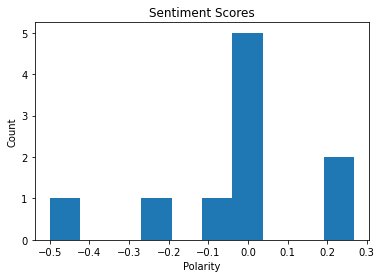

Sentiment score histogram:
-------------------------
Polarity score ranges from -1 (very negative) to 1 (very positive).


In [27]:
main()